# Before starting the pain, here is a fun meme about decision tree <br>

<center> <img src="https://www.catster.com/wp-content/uploads/2015/06/4d7b24e783483f4092e303c48d1a7953.png"  alt="Drawing" style="width: 600px;"/> </center>


-----

# Dear tree 🌴, why do you require so many parameters to grow?
And you would probably react with my parameter choice like...


<center> <img src="https://media.giphy.com/media/FVIflnMFdGoMw/giphy.gif"  height="500px" width="500px"> </center>



# Introduction

Hi guys! 

I hope that your Kaggle journey is going well! While working on my kernel/stalking what others worked on, I thought that it would be helpful to some people if I made a kernel about the comparison between Xgboost and Lightgbm and Bayesian Optimization (regression). Although there are many kernels that implement these techniques, I infrequently saw kernels that explained about them. So, I tried my best to explain these concepts by putting things together from different resources! Hope that it will be helpful to you guys 😃

# Special Thanks to: <br>


Thanks to [Andrew Lukyanenko's kernel](https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation) and [btyuhas's kernel](https://www.kaggle.com/btyuhas/bayesian-optimization-with-xgboost)!! <br>
And if you are interested in seeing Bayesian Optimization tuning on binary classification problems, here is [my kernel](https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm). Also, I worked on some extensive EDA work on [this kernel](https://www.kaggle.com/somang1418/eda-lgb-xgb-modelings-with-a-cute-panda-meme). 



<br>
# ** CONTENTS**

1. [Lightgbm vs. Xgboost and Why Do We Care?](#1)
2. [What Is Bayesian Optimization and Why Do We Care?](#2)
3. [Loading Library and Dataset](#3)
4. [Bayesian Optimization with XGBOOST and LightGBM](#4)
5. [Training XGBOOST and LightGBM](#5)





----
<a id="1"></a> 
# **1. Lightgbm vs. Xgboost and Why Do We Care?**  <br>

**Lightgbm** is  a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning task. [(source)](https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/) Like Xgboost, it is based on decision tree algorithms, but <u>Lightgbm splits the tree leaf wise with the best fit while Xgboost splits the tree level wise.</u> The upper figure demonstrates Lightgbm, and the lower figure demonstrates Xgboost. <br><br>


<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/11194227/depth.png"  alt="Drawing" style="width: 600px;"/>

<img src="https://t4.ftcdn.net/jpg/00/95/63/41/240_F_95634124_ticAi4oZV4gHnVVOK5KbhA29SJnypKGY.jpg"  alt="Drawing" style="width: 200px;"/>

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/11194110/leaf.png"  alt="Drawing" style="width: 600px;"/>

<br> 


<br>
* **Well..why do we care about it?** <br><br>
The biggest adventage of Lightgbm is <span style="color: red; font-family: sans-serif; font-size: 1.1em;">**Speed!**</span> Faster speed allows faster hyperparameter searches when optimizing the model. We can create more possible combinations to be tested than if using XGBoost in the same time period. The speed also allows for adding more cross-validation testing to get more accurate metrics of how your model will generalize. <br><br>
* **Why is it faster?** <br><br>
LightGBM uses a novel technique of Gradient-based One-Side Sampling (GOSS) to filter out the data instances for finding a split value while XGBoost uses pre-sorted algorithm & Histogram-based algorithm for computing the best split. GOSS excludes a significant proportion of data instances with small gradients, only use the rest to estimate the information gain, and obtain quite accurate estimation of the information gain with a much smaller data size. [(source)](https://papers.nips.cc/paper/6907-lightgbm-a-highly-efficient-gradient-boosting-decision-tree.pdf) I will compare the time difference between xgboost and lightgbm at the end! <br><br>
* **Time Comparison between them** <br><br>
<u>On average, Xgboost took twice or more longer than lightgbm! </u> 
---

<a id="2"></a> 
# **2. What Is Bayesian Optimization and Why Do We Care?** <br>

**Bayesian Optimization** is a probabilistic model based approach for finding the minimum of any function that returns a real-value metric. [(source)](https://towardsdatascience.com/an-introductory-example-of-bayesian-optimization-in-python-with-hyperopt-aae40fff4ff0) It is very effective with real-world applications in high-dimensional parameter-tuning for complex machine learning algorithms. Bayesian optimization utilizes the Bayesian technique of setting a prior over the objective function and
combining it with evidence to get a posterior function.<br> <br>

<img src="https://www.researchgate.net/profile/Michael_Gutmann/publication/270906114/figure/fig2/AS:614141605707791@1523434177308/The-first-iterations-of-Bayesian-optimization-to-estimate-the-mean-of-a-Gaussian-The.png"  alt="Drawing" style="width: 600px;"/>
<br> <br> 
 The prior belief is our belief in parameters before modeling process. The posterior belief is our belief in our parameters after observing the evidence. <br>
<br> Another way to demonstrate Bayesian Optimization is: 

<img src="http://www.resibots.eu/limbo/_images/bo_concept.png"  alt="Drawing" style="width: 600px;"/> <br> 

For continuous functions, Bayesian optimization typically works by assuming the unknown function was sampled from a Gaussian process and maintains a posterior distribution for this function as observations are made, which means that we need to give range of values of hyperparameters (ex. learning rate range from 0.1 to 1).  So, in our case, the Gaussian process gives us a prior distribution on functions. Gaussian process approach is a non-parametric approach, in that it finds a distribution over the possible functions 
f(x) that are consistent with the observed data. Gaussian processes have proven to be useful surrogate models for computer experiments and good
practices have been established in this context for sensitivity analysis, calibration and prediction While these strategies are not considered in the context of optimization, they can be useful to researchers in machine learning who wish to understand better the sensitivity of their models to various hyperparameters. [(source)](http://papers.nips.cc/paper/4522-practical-bayesian-optimization-of-machine-learning-algorithms.pdf)

<br>
* **Well..why do we care about it?** <br><br>
According to the [study](http://proceedings.mlr.press/v28/bergstra13.pdf), hyperparameter tuning by Bayesian Optimization of machine learning models is more efficient than Grid Search and Random Search. Bayesian Optimization has better overall performance on the test data and takes less time for optimization. Also, we do not need to set a certain values of parameters like we do in Random Search and Grid Search. For Bayesian Optimization tuning, we just give a range of a hyperparameter. 

<br>
* **Time Comparison to Grid Search/Random Search** <br><br>
I tried to run Grid Search for the model in [a different kernel](https://www.kaggle.com/somang1418/eda-lgb-xgb-modelings-with-a-cute-panda-meme), but after running for 3 hours, I decided to stop it because it took too long (when you do not have anything else to do and want to feel productive while watching some videos, I suggest you to run it 😂). For Bayesian Optimization, it takes significantly less than these two methods! Depending on the number of iteration and exploration and model type (xgboost vs. lightgbm) time varies. I used 10 random exploration and 15 iteration to tune 5 hyperparameters (xgboost) and 7 hyperparameters (lightgbm). <u> It took 30 min for xgboost and 12 min for lightgbm to tune hyperparameters by Bayesian Optimization! </u>

-----

<a id="3"></a> 
# **3. Loading Library and Dataset** <br>

I already did feature engineering with [a different kernel](https://www.kaggle.com/somang1418/eda-lgb-xgb-modelings-with-a-cute-panda-meme). Feel free to use the dataset!

In [1]:
import numpy as np 
import pandas as pd 
import os
import json
from pandas.io.json import json_normalize
import ast
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
%matplotlib notebook
from scipy.stats import skew, boxcox
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.mplot3d import Axes3D
import ast
import re
import yaml
import json
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
import xgboost as xgb
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import eli5
import time
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import warnings  
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


In [ ]:
print(os.listdir("../input"))

In [2]:
%%time 

train_new= pd.read_csv('../input/train-new/train_new.csv')
test_new = pd.read_csv('../input/train-new/test_new.csv')
sam_sub = pd.read_csv('../input/tmdb-box-office-prediction/sample_submission.csv')
print( "train dataset:", train_new.shape,"\n","test dataset: ",test_new.shape,"\n","sample_submission dataset:", sam_sub .shape)

train dataset: (3000, 303) 
 test dataset:  (4398, 302) 
 sample_submission dataset: (4398, 2)
CPU times: user 396 ms, sys: 64 ms, total: 460 ms
Wall time: 482 ms


## Let's do some experiments right here 💡

I made two datasets, which I used two different methods of filling NAs. For the first dataset (train dataset name: train_new, test dataset name: test_new), I filled out NAs with each column's mean of train for train and each column's mean of test for test.  For the second dataset (train dataset name: train_new_agg, test dataset name: test_new_agg), I appended train and test and filled out NAs with each column's mean of the whole dataset, which I demonstarated below. **Let's see which one scores better at the end!**

In [3]:
#append train and test and replace NAs with mean of each column

train_new_agg=train_new
test_new_agg=test_new

train_new_agg['dataset']='train'
test_new_agg['dataset']='test'

big_and_beautiful_data=train_new_agg.append(test_new_agg)

del train_new_agg
del test_new_agg

#numerical mean replacement 
numerical_cols_df =[c for c in big_and_beautiful_data.columns if big_and_beautiful_data[c].dtype in [np.float, np.int] and c not in ['revenue', 'id']]
categorical_cols_df = [c for c in big_and_beautiful_data.columns if big_and_beautiful_data[c].dtype in [np.object]]
big_and_beautiful_data_num=big_and_beautiful_data[numerical_cols_df].fillna(big_and_beautiful_data[numerical_cols_df].mean()) 
big_and_beautiful_data= pd.concat([big_and_beautiful_data_num, big_and_beautiful_data[categorical_cols_df],big_and_beautiful_data[['revenue', 'id']]], axis=1)


In [4]:
#replace by mean of train and test 
numerical_cols_train =[c for c in train_new.columns if train_new[c].dtype in [np.float, np.int] and c not in ['revenue', 'id']]
categorical_cols_train = [c for c in train_new.columns if train_new[c].dtype in [np.object]]
train_new_num=train_new[numerical_cols_train].fillna(train_new[numerical_cols_train].mean()) 
train_new= pd.concat([train_new_num, train_new[categorical_cols_train],train_new[['revenue', 'id']]], axis=1)

numerical_cols_test =[c for c in test_new.columns if test_new[c].dtype in [np.float, np.int] and c not in ['id']]
categorical_cols_test = [c for c in test_new.columns if test_new[c].dtype in [np.object]]
test_new_num=test_new[numerical_cols_test].fillna(test_new[numerical_cols_test].mean()) 
test_new= pd.concat([test_new_num, test_new[categorical_cols_test],test_new[['id']]], axis=1)

In [5]:
#dropping unnecessary columns 
drop_columns=['homepage','imdb_id','poster_path','status','title', 'tagline', 'overview', 'original_title','all_genres','all_cast',
             'original_language','collection_name','all_crew']
train_new=train_new.drop(drop_columns,axis=1)
test_new=test_new.drop(drop_columns,axis=1)

In [6]:
big_and_beautiful_data=big_and_beautiful_data.drop(drop_columns,axis=1)

train_mean_agg=big_and_beautiful_data.loc[big_and_beautiful_data['dataset']=='train']
test_mean_agg=big_and_beautiful_data.loc[big_and_beautiful_data['dataset']=='test']

train_mean_agg=train_mean_agg.drop('dataset',axis=1)
test_mean_agg=test_mean_agg.drop(['dataset','revenue'],axis=1)
train_new=train_new.drop('dataset',axis=1)
test_new=test_new.drop('dataset',axis=1)


print( "updated train dataset:", train_new.shape,"\n","updated test dataset: ",test_new.shape)
print( "updated train agg dataset:", train_mean_agg.shape,"\n","updated test agg dataset: ",test_mean_agg.shape)


# Just double checking the difference of variables between train and test 
print(train_new.columns.difference(test_new.columns)) # good to go! 
print(train_mean_agg.columns.difference(test_mean_agg.columns)) # good to go! 

updated train dataset: (3000, 290) 
 updated test dataset:  (4398, 289)
updated train agg dataset: (3000, 290) 
 updated test agg dataset:  (4398, 289)
Index(['revenue'], dtype='object')
Index(['revenue'], dtype='object')


----
<a id="4"></a> 
# **4. Bayesian Optimization with XGBOOST and LightGBM**  <br>


<img src="https://github.com/fmfn/BayesianOptimization/raw/master/examples/func.png"  alt="Drawing" style="width: 600px;"/>
<br>

Finally, we get to use Bayesian Optimization here! Just in case you are interested in, I put the [official github page for Bayesian Optimization](https://github.com/fmfn/BayesianOptimization) <br><br>

* **First**, prepare the dataset for optimization. Divide it as X (independent variable) and target (dependent variable) 



* **Second**, put hyperparameters that you want to put as input of lgb_eval function and specify the minimum and maximum values of hyperparameters in BayesianOptimization function <br> 
> For example, 'learning_rate': (0.01, 0.2) means that the optimization function will find the optimal value of learning rate in between 0.01 to 0.2 

* **Second and a half**, Here are the explanation for parameters that I used. There are lots of parameters to explore for Lightgbm (you can even use xgboost dart mode by setting xgboost_dart_mode=True 👉 [more info](https://lightgbm.readthedocs.io/en/latest/Parameters.html) ) <br> 

### [For Xgboost](https://xgboost.readthedocs.io/en/latest/parameter.html) 

> **max_depth**: limit the max depth for tree model. *default=6* <br>
**min_child_weight**: Minimum sum of instance weight (hessian) needed in a child.  *default=1* <br>
**subsample**:subsample ratio of the training instances. *default = 1* <br>
**eta**: step size shrinkage used in update to prevents overfitting *default = 0.1* <br>
**colsample_bytree**: subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.  *default = 1* <br> <br>


### [For Lightgbm](https://lightgbm.readthedocs.io/en/latest/Parameters.html) 

> **max_depth**: limit the max depth for tree model. *default=-1 (no limit)* <br>
**min_data_in_leaf**: minimal number of data in one leaf.  *default=20* <br>
**num_leaves**:max number of leaves in one tree.It controls the complexity of the tree moodel. *default = 31* <br>
**learning_rate**: shrinkage rate *default = 0.1* <br>
**bagging_fraction**: work like feature_fraction, but this will randomly select part of data without resampling.  *default = 1* <br>
**lambda_l1**: L1 regularization. *default = 0* <br>
**lambda_l2**: L2 regularization. *default = 0* <br> <br>

<span style="color: blue; font-family: sans-serif; font-size: 1.1em;">In order to avoid overfitting:</span> <br> <br> ▪️ Use small max_bin 🔽<br> ▪️ Use small num_leaves 🔽 <br> ▪️ Use min_data_in_leaf and min_sum_hessian_in_leaf <br> ▪️ Use bagging by set bagging_fraction and bagging_freq <br> ▪️ Use feature sub-sampling by set feature_fraction <br> ▪️ Try lambda_l1, lambda_l2 and min_gain_to_split for regularization <br> ▪️ Try max_depth to avoid growing deep tree
<br> <br> <br> <span style="color: blue; font-family: sans-serif; font-size: 1.1em;">For better accuracy:</span> <br> <br> ▪️ Use large max_bin (may be slower) 🔼 <br> ▪️ Use small learning_rate 🔽 with large num_iterations 🔼 <br> ▪️ Use large num_leaves (may cause over-fitting) 🔼 <br> ▪️ Try dart <br> <br> **Now, we are ready to use the optimization function 😊**

<br>

* **Third**, the BayesianOptimization object will work out of the box without much tuning needed. Maximize the function! Here are some explanation of parameters <br> 
> **init_points**: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space <br> **n_iter**: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.

-----


# **XGB Optmiziation**
## First dataset (non-agg mean filled one)


In [30]:
%%time 

X = train_new.drop(['id', 'revenue','release_date'], axis=1)
y = np.log1p(train_new['revenue'])
X_test = test_new.drop(['id','release_date'], axis=1)

dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test)

def xgb_evaluate(max_depth, subsample, eta, min_child_weight,colsample_bytree):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample':subsample,
              'eta': eta,
              'min_child_weight': int(min_child_weight),
              'colsample_bytree': colsample_bytree}

    cv_result = xgb.cv(params, dtrain, num_boost_round=5000, nfold=3, early_stopping_rounds=50)    
    
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1] #because Bayesian Optimization function maximizes, we have to flip the number by multiplying by -1



xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (0, 6), 
                                             'subsample': (0.6, 1),
                                             'eta':(0.01, 0.4),
                                             'min_child_weight':(1, 30),
                                             'colsample_bytree':(0.6, 1)})

xgb_bo.maximize(init_points=10, n_iter=15, acq='ei')


model_rmse=[]
for model in range(len(xgb_bo.res)):
    model_rmse.append(xgb_bo.res[model]['target'])
    
xgb_bo.res[pd.Series(model_rmse).idxmax()]['target']
xgb_opt_params = xgb_bo.res[pd.Series(model_rmse).idxmax()]['params']
xgb_opt_params['max_depth']= int(round(xgb_opt_params['max_depth']))
xgb_opt_params['objective']='reg:linear'
xgb_opt_params['eval_metric']='rmse'
    


|   iter    |  target   | colsam... |    eta    | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------
|  1        | -2.069    |  0.6569   |  0.2874   |  1.887    |  10.16    |  0.8295   |
|  2        | -2.054    |  0.9387   |  0.3183   |  2.038    |  26.32    |  0.778    |
|  3        | -2.052    |  0.7228   |  0.1958   |  1.251    |  17.48    |  0.8968   |
|  4        | -2.976    |  0.7777   |  0.3605   |  0.3509   |  10.14    |  0.9547   |
|  5        | -2.007    |  0.6972   |  0.08866  |  3.475    |  19.09    |  0.6606   |
|  6        | -2.012    |  0.9259   |  0.2881   |  2.813    |  7.676    |  0.9004   |
|  7        | -2.057    |  0.9407   |  0.04881  |  1.883    |  25.63    |  0.752    |
|  8        | -2.059    |  0.6271   |  0.04753  |  1.297    |  16.6     |  0.6471   |
|  9        | -2.02     |  0.8539   |  0.06567  |  2.204    |  27.43    |  0.7142   |
|  10       | -2.976    |  0.6652   |  0.2025   |  0.9

While waiting, feel free to enjoy this amazing panda video ❤️❤️ <br> 

You can also watch [live cam panda video](https://nationalzoo.si.edu/webcams/panda-cam) from the Smithsonian's National Zoo website. So cool! 

<center><iframe width="560" height="315" src="https://www.youtube.com/embed/WwHOGLqT0OE" frameborder="0" allowfullscreen></iframe></center>



In [33]:
xgb_opt_params 

{'colsample_bytree': 1.0,
 'eta': 0.01,
 'max_depth': 4,
 'min_child_weight': 3.069784901942814,
 'subsample': 0.6,
 'objective': 'reg:linear',
 'eval_metric': 'rmse'}

# **LGB Optimization**
## First dataset (non-agg mean filled one)

In [31]:
%%time 

X = train_new.drop(['id', 'revenue','release_date'], axis=1)
y = np.log1p(train_new['revenue'])

train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
   

def lgb_eval(learning_rate, num_leaves, bagging_fraction, max_depth, min_data_in_leaf, lambda_l1, lambda_l2):
    
    params = {
            'application': 'regression',
            'metric': 'rmse',
            'learning_rate': learning_rate,
            'num_leaves':int(round(num_leaves)),
            'bagging_fraction':bagging_fraction,   
            'max_depth': int(round(max_depth)),
            'min_data_in_leaf':int(round(min_data_in_leaf)),
            'lambda_l1':lambda_l1,
            'lambda_l2':lambda_l2}
    
    
    cv_result = lgb.cv(params, train_data, num_boost_round=5000, nfold=3,stratified =False,early_stopping_rounds=50)    
    
    return -1.0 * min(cv_result['rmse-mean'])

#put min/max of hyperparameter that you want to test 
lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 0.2),
                                            'num_leaves': (2,31 ),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (-1, 5),
                                            'min_data_in_leaf': (2, 20),
                                           'lambda_l1': (0, 5),
                                           'lambda_l2': (0, 5)}, random_state=200)
    
lgbBO.maximize(init_points=10, n_iter=15, acq='ei')
model_rmse=[]
for model in range(len(lgbBO.res)):
    model_rmse.append(lgbBO.res[model]['target'])
    
lgbBO.res[pd.Series(model_rmse).idxmax()]['target']
lgb_opt_params = lgbBO.res[pd.Series(model_rmse).idxmax()]['params']
lgb_opt_params['max_depth']= int(round(lgb_opt_params['max_depth']))
lgb_opt_params['num_leaves']= int(round(lgb_opt_params['num_leaves']))
lgb_opt_params['min_data_in_leaf']= int(round(lgb_opt_params['min_data_in_leaf']))

lgb_opt_params['application']='regression'
lgb_opt_params['metric']='rmse'
    

|   iter    |  target   | baggin... | lambda_l1 | lambda_l2 | learni... | max_depth | min_da... | num_le... |
-------------------------------------------------------------------------------------------------------------
|  1        | -1.984    |  0.9895   |  1.133    |  2.972    |  0.09138  |  3.585    |  2.051    |  12.37    |
|  2        | -2.021    |  0.9819   |  2.28     |  4.909    |  0.1748   |  4.916    |  18.62    |  10.81    |
|  3        | -2.031    |  0.9692   |  0.6061   |  3.928    |  0.0576   | -0.4238   |  18.98    |  25.96    |
|  4        | -1.994    |  0.9037   |  4.368    |  2.892    |  0.09552  |  3.081    |  9.55     |  20.57    |
|  5        | -2.015    |  0.9217   |  0.5272   |  4.83     |  0.1542   |  3.078    |  7.928    |  2.767    |
|  6        | -2.041    |  0.9607   |  4.864    |  1.415    |  0.1333   |  0.5935   |  5.378    |  14.15    |
|  7        | -1.987    |  0.9332   |  2.587    |  4.272    |  0.04249  |  4.869    |  7.423    |  8.741    |
|  8      

In [17]:
lgb_opt_params

{'bagging_fraction': 0.957598249920741,
 'lambda_l1': 1.864627430966489,
 'lambda_l2': 4.106293085815415,
 'learning_rate': 0.061363835978735674,
 'max_depth': 4,
 'min_data_in_leaf': 3,
 'num_leaves': 30,
 'application': 'regression',
 'metric': 'rmse'}

----
<a id="5"></a> 
# **5. Training Xgboost and Lightgbm**  <br>

I used 10 folds cross-validation. 

In [ ]:
n_fold = 10
random_seed=2222
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)


X = train_new.drop(['id', 'revenue','release_date'], axis=1)
y = np.log1p(train_new['revenue'])
X_test = test_new.drop(['id','release_date'], axis=1)


In [11]:
def train_model(X, X_test, y, params=None, folds=folds, model_type='lgb', plot_feature_importance=True, model=None):

    oof = np.zeros(X.shape[0])
    prediction = np.zeros(X_test.shape[0])
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print('Fold', fold_n, 'started at', time.ctime())
        if model_type == 'sklearn':
            X_train, X_valid = X[train_index], X[valid_index]
        else:
            X_train, X_valid = X.values[train_index], X.values[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
                    verbose=100, early_stopping_rounds=100)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=10000, evals=watchlist, early_stopping_rounds=100, verbose_eval=100, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test.values), ntree_limit=model.best_ntree_limit)

        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            score = mean_squared_error(y_valid, y_pred_valid)
            
            y_pred = model.predict(X_test)
            
        if model_type == 'cat':
            model = CatBoostRegressor(iterations=10000,  eval_metric='RMSE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid.reshape(-1,)
        scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
        prediction += y_pred    
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction
        return oof, prediction
    
    else:
        return oof, prediction

In [13]:
%%time 
oof_xgb, prediction_xgb = train_model(X, X_test, y, params=xgb_opt_params, model_type='xgb')

Fold 0 started at Fri Apr 19 15:14:45 2019
[0]	train-rmse:15.0064	valid_data-rmse:15.1621
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:1.12674	valid_data-rmse:1.86202
Stopping. Best iteration:
[377]	train-rmse:1.24002	valid_data-rmse:1.85518

Fold 1 started at Fri Apr 19 15:14:51 2019
[0]	train-rmse:15.048	valid_data-rmse:14.9965
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:1.17463	valid_data-rmse:1.80015
Stopping. Best iteration:
[661]	train-rmse:1.05591	valid_data-rmse:1.79661

Fold 2 started at Fri Apr 19 15:15:01 2019
[0]	train-rmse:15.039	valid_data-rmse:15.0291
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
Stopping. Best

Fold 0 started at Fri Apr 19 15:23:42 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[145]	training's rmse: 1.42974	valid_1's rmse: 1.84699
Fold 1 started at Fri Apr 19 15:23:43 2019
Training until validation scores don't improve for 200 rounds.
[500]	training's rmse: 0.90081	valid_1's rmse: 1.81598
Early stopping, best iteration is:
[448]	training's rmse: 0.964493	valid_1's rmse: 1.81515
Fold 2 started at Fri Apr 19 15:23:44 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[149]	training's rmse: 1.45207	valid_1's rmse: 1.77816
Fold 3 started at Fri Apr 19 15:23:45 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[240]	training's rmse: 1.18495	valid_1's rmse: 2.21958
Fold 4 started at Fri Apr 19 15:23:46 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[63]	training's rms

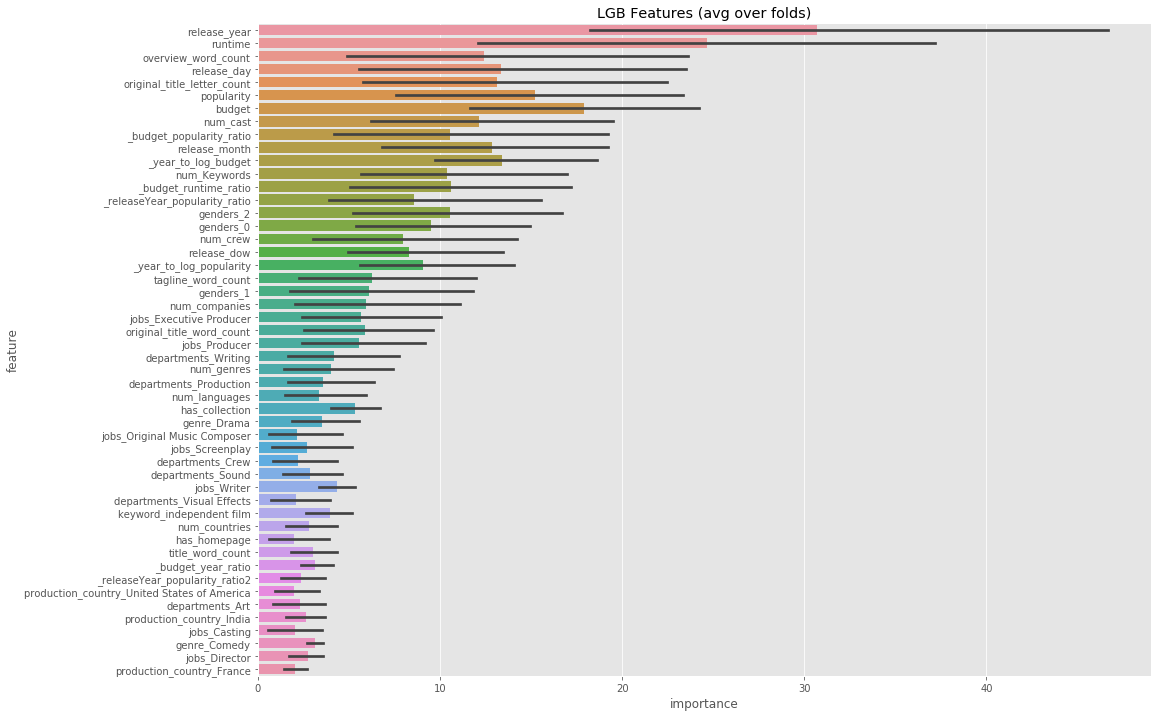

In [20]:
%%time 

oof_lgb, prediction_lgb = train_model(X, X_test, y, params=lgb_opt_params, model_type='lgb')

# **XGB Optimization**
## Second dataset (agg mean filled one)

In [32]:
%%time 

X = train_mean_agg.drop(['id', 'revenue','release_date'], axis=1)
y = np.log1p(train_mean_agg['revenue'])
X_test = test_mean_agg.drop(['id','release_date'], axis=1)

dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_test)

def xgb_evaluate(max_depth, subsample, eta, min_child_weight,colsample_bytree):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample':subsample,
              'eta': eta,
              'min_child_weight': int(min_child_weight),
              'colsample_bytree': colsample_bytree}

    cv_result = xgb.cv(params, dtrain, num_boost_round=5000, nfold=3, early_stopping_rounds=50)    
    
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]



xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (0, 6), 
                                             'subsample': (0.6, 1),
                                             'eta':(0.01, 0.4),
                                             'min_child_weight':(1, 30),
                                             'colsample_bytree':(0.6, 1)})

xgb_bo.maximize(init_points=10, n_iter=15, acq='ei')

model_rmse=[]
for model in range(len(xgb_bo.res)):
    model_rmse.append(xgb_bo.res[model]['target'])
    
xgb_bo.res[pd.Series(model_rmse).idxmax()]['target']
xgb_opt_params = xgb_bo.res[pd.Series(model_rmse).idxmax()]['params']
xgb_opt_params['max_depth']= int(round(xgb_opt_params['max_depth']))
xgb_opt_params['objective']='reg:linear'
xgb_opt_params['eval_metric']='rmse'
    


|   iter    |  target   | colsam... |    eta    | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------
|  1        | -2.073    |  1.0      |  0.1133   |  1.107    |  1.54     |  0.74     |
|  2        | -1.97     |  0.8656   |  0.1658   |  3.5      |  5.414    |  0.8702   |
|  3        | -2.976    |  0.6405   |  0.1081   |  0.9849   |  5.278    |  0.8316   |
|  4        | -2.085    |  0.8119   |  0.3396   |  1.737    |  8.089    |  0.6284   |
|  5        | -2.072    |  0.8816   |  0.2755   |  1.558    |  1.351    |  0.6944   |
|  6        | -2.043    |  0.7782   |  0.2879   |  2.634    |  26.57    |  0.9238   |
|  7        | -2.976    |  0.6681   |  0.01876  |  0.5775   |  20.95    |  0.9029   |
|  8        | -2.065    |  0.9469   |  0.1682   |  1.555    |  27.02    |  0.9395   |
|  9        | -2.05     |  0.9909   |  0.3414   |  2.731    |  3.993    |  0.6931   |
|  10       | -2.047    |  0.9454   |  0.3244   |  3.0

In [ ]:
xgb_opt_params

# **LGM Optimization**
## Second dataset (agg mean filled one)

In [26]:
%%time 

X = train_mean_agg.drop(['id', 'revenue','release_date'], axis=1)
y = np.log1p(train_mean_agg['revenue'])
X_test = test_mean_agg.drop(['id','release_date'], axis=1)

train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
   

def lgb_eval(learning_rate, num_leaves, bagging_fraction, max_depth, min_data_in_leaf, lambda_l1, lambda_l2):
    
    params = {
            'application': 'regression',
            'metric': 'rmse',
            'learning_rate': learning_rate,
            'num_leaves':int(round(num_leaves)),
            'bagging_fraction':bagging_fraction,   
            'max_depth': int(round(max_depth)),
            'min_data_in_leaf':int(round(min_data_in_leaf)),
            'lambda_l1':lambda_l1,
            'lambda_l2':lambda_l2}
    
    
    cv_result = lgb.cv(params, train_data, num_boost_round=5000, nfold=3,stratified =False,early_stopping_rounds=50)    
    
    return -1.0 * min(cv_result['rmse-mean'])

#put min/max of hyperparameter that you want to test 
lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 0.2),
                                            'num_leaves': (2,31 ),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (-1, 5),
                                            'min_data_in_leaf': (2, 20),
                                           'lambda_l1': (0, 5),
                                           'lambda_l2': (0, 5)}, random_state=200)
    
    
    
lgbBO.maximize(init_points=10, n_iter=15, acq='ei')
model_rmse=[]
for model in range(len(lgbBO.res)):
    model_rmse.append(lgbBO.res[model]['target'])
    
lgbBO.res[pd.Series(model_rmse).idxmax()]['target']
lgb_opt_params = lgbBO.res[pd.Series(model_rmse).idxmax()]['params']
lgb_opt_params['max_depth']= int(round(lgb_opt_params['max_depth']))
lgb_opt_params['num_leaves']= int(round(lgb_opt_params['num_leaves']))
lgb_opt_params['min_data_in_leaf']= int(round(lgb_opt_params['min_data_in_leaf']))

lgb_opt_params['application']='regression'
lgb_opt_params['metric']='rmse'
    


|   iter    |  target   | baggin... | lambda_l1 | lambda_l2 | learni... | max_depth | min_da... | num_le... |
-------------------------------------------------------------------------------------------------------------
|  1        | -1.99     |  0.9895   |  0.2265   |  0.5944   |  0.09138  |  3.585    |  2.051    |  12.37    |
|  2        | -1.982    |  0.9576   |  0.3729   |  0.8213   |  0.06136  |  3.768    |  3.485    |  30.17    |
|  3        | -2.057    |  0.9576   |  0.79     |  0.5551   |  0.1696   | -0.695    |  19.98    |  30.75    |
CPU times: user 25.9 s, sys: 1.55 s, total: 27.5 s
Wall time: 17.7 s


In [27]:
lgb_opt_params

{'bagging_fraction': 0.957598249920741,
 'lambda_l1': 0.3729254861932978,
 'lambda_l2': 0.821258617163083,
 'learning_rate': 0.061363835978735674,
 'max_depth': 4,
 'min_data_in_leaf': 3,
 'num_leaves': 30,
 'application': 'regression',
 'metric': 'rmse'}

In [28]:
%%time 
oof_xgb_agg, prediction_xgb_agg = train_model(X, X_test, y, params=xgb_opt_params, model_type='xgb')

Fold 0 started at Fri Apr 19 15:31:20 2019
[0]	train-rmse:14.8249	valid_data-rmse:14.9757
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:1.31747	valid_data-rmse:1.84791
Stopping. Best iteration:
[391]	train-rmse:1.40504	valid_data-rmse:1.84255

Fold 1 started at Fri Apr 19 15:31:25 2019
[0]	train-rmse:14.8656	valid_data-rmse:14.8168
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:1.36508	valid_data-rmse:1.79215
Stopping. Best iteration:
[580]	train-rmse:1.30611	valid_data-rmse:1.78528

Fold 2 started at Fri Apr 19 15:31:32 2019
[0]	train-rmse:14.8564	valid_data-rmse:14.8469
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-

Fold 0 started at Fri Apr 19 15:37:13 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[177]	training's rmse: 1.40543	valid_1's rmse: 1.8622
Fold 1 started at Fri Apr 19 15:37:14 2019
Training until validation scores don't improve for 200 rounds.
[500]	training's rmse: 0.997662	valid_1's rmse: 1.80914
Early stopping, best iteration is:
[508]	training's rmse: 0.985381	valid_1's rmse: 1.80773
Fold 2 started at Fri Apr 19 15:37:15 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[112]	training's rmse: 1.55366	valid_1's rmse: 1.8079
Fold 3 started at Fri Apr 19 15:37:16 2019
Training until validation scores don't improve for 200 rounds.
[500]	training's rmse: 0.961553	valid_1's rmse: 2.23898
Early stopping, best iteration is:
[374]	training's rmse: 1.08083	valid_1's rmse: 2.22591
Fold 4 started at Fri Apr 19 15:37:17 2019
Training until validation scores don't improve for 200 rounds.

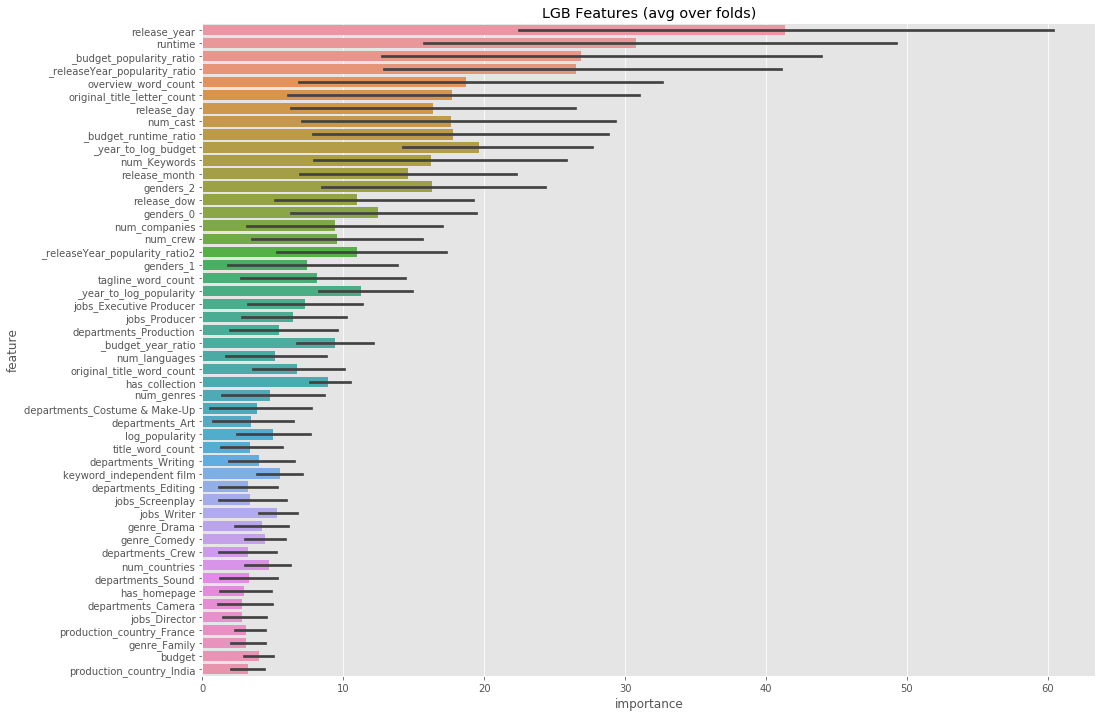

In [29]:
%%time 

oof_lgb_agg, prediction_lgb_agg = train_model(X, X_test, y, params=lgb_opt_params, model_type='lgb')

# Final step: don't forget to submit your prediction and upvote if this kernel was useful :)

In [ ]:
sam_sub['revenue'] = np.expm1(prediction_lgb)
sam_sub.to_csv("lgb.csv", index=False)
sam_sub['revenue'] = np.expm1(prediction_xgb)
sam_sub.to_csv("xgb.csv", index=False)

sam_sub['revenue'] = np.expm1(prediction_lgb_agg)
sam_sub.to_csv("lgb_agg.csv", index=False)
sam_sub['revenue'] = np.expm1(prediction_xgb_agg)
sam_sub.to_csv("xgb_agg.csv", index=False)



sam_sub['revenue'] = np.expm1((prediction_lgb + prediction_xgb) / 2)
sam_sub.to_csv("blend_lgb_xgb.csv", index=False)

sam_sub['revenue'] = np.expm1((prediction_lgb_agg + prediction_xgb_agg) / 2)
sam_sub.to_csv("blend_lgb_xgb_agg.csv", index=False)

sam_sub['revenue'] = np.expm1(( prediction_lgb + prediction_xgb +prediction_lgb_agg + prediction_xgb_agg) / 4)
sam_sub.to_csv("put_them_all.csv", index=False)

# <center> Thank you for reading my kernel and keep working hard 👍 </center>
<center> <img src="https://media.giphy.com/media/jaXDDTuKmeJvwI56kV/giphy.gif "  height="600px" width="600px"> </center>

